**SIMPLE LINEAR REGRESSION**

Estimated coefficients:
b_0=-0.05862068965517242
b_1=1.457471264367816


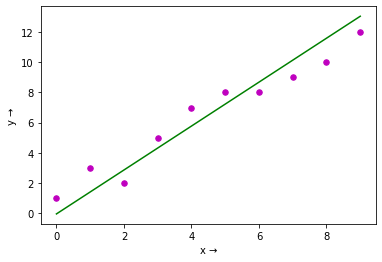

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x,y):
    n=np.size(x)
    m_x=np.mean(x)
    m_y=np.mean(y)
    ss_xy=np.sum(y*x-n*m_x*m_y)
    ss_xx=np.sum(x*x-n*m_x*m_x)
    b_1=ss_xy/ss_xx
    b_0=m_y-b_1*m_x
    return(b_0,b_1)

def regression_line(x,y,b):
    plt.scatter(x,y,color="m",marker="o",s=30)
    y_pred=b[0]+b[1]*x
    plt.plot(x,y_pred,color="g")
    plt.xlabel('x →')
    plt.ylabel('y →')
    plt.show()

def main():
    x=np.array([0,1,2,3,4,5,6,7,8,9])
    y=np.array([1,3,2,5,7,8,8,9,10,12])
    b=estimate_coef(x,y)
    print("Estimated coefficients:\nb_0={}\nb_1={}".format(b[0],b[1]))
    regression_line(x,y,b)

if __name__ == "__main__":
    main()

**MULTIPLE LINEAR REGRESSION**

Coefficients: 
 [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]
Variance score: 0.7836295385076281


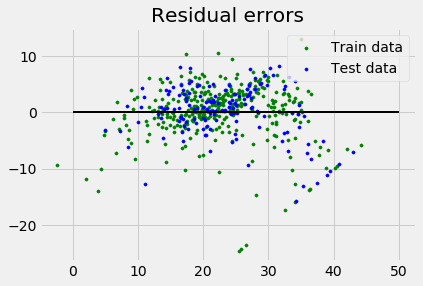

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
%matplotlib inline

boston=datasets.load_boston(return_X_y=False)
X=boston.data
y=boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
print('Coefficients: \n',reg.coef_)
print('Variance score: {}'.format(\
                                  reg.score(X_test,y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train,
           color="green",s=10,label='Train data')
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,
            color="blue",s=10,label='Test data')
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()